# Predicting Transaction Volumes in Kenya's Electronic Payment System: A Regression Analysis Incorporating GDP and Inflation Data

**Problem Statement:**

In recent years, Kenya has experienced significant growth in electronic payment transactions facilitated through the Kenya Electronic Payment Settlement System Real-Time Gross Settlement (KEPSSRTGS). Understanding the factors influencing transaction volumes and values in the KEPSSRTGS system is essential for financial institutions and policymakers to make informed decisions and optimize financial operations.

To this end, the aim of this project is to build a regression model that predicts transaction volumes or values in the KEPSSRTGS system based on economic indicators, specifically GDP and inflation rates in Kenya. By analyzing the relationship between transaction activity, GDP growth, and inflation, we can identify the key drivers of electronic payment transactions and anticipate future transaction trends.

**Dataset:**
- We have access to three datasets: one containing information about transaction volumes and values related to KEPSSRTGS, another containing GDP data for Kenya, and a third containing inflation rates in Kenya. Each dataset spans from January 2013 to February 2024, with monthly granularity.

**Objective:**
- Develop a regression model that predicts transaction volumes or values in the KEPSSRTGS system based on GDP and inflation data.
- Understand the impact of GDP growth and inflation on transaction activity in the KEPSSRTGS system.
- Provide insights and recommendations for financial institutions and policymakers to optimize electronic payment operations and promote financial stability.

**Approach:**
1. **Data Preprocessing**: Clean and preprocess the datasets, handle missing values, outliers, and ensure compatibility for merging.
2. **Merge Datasets**: Combine the datasets based on the "Year" and "Month" columns to create a unified dataset.
3. **Feature Engineering**: Create new features or derive additional information from the merged dataset, such as GDP growth rate and inflation trends.
4. **Model Selection**: Choose a regression algorithm suitable for the dataset, such as linear regression or ridge regression.
5. **Model Training**: Train the regression model using the merged dataset, with transaction volumes/values as the dependent variable and GDP, inflation, and other relevant features as independent variables.
6. **Model Evaluation**: Evaluate the performance of the trained regression model using metrics such as mean squared error (MSE) or R-squared.
7. **Fine-Tuning and Validation**: Fine-tune the model parameters if necessary and validate the model's performance using cross-validation techniques.
8. **Prediction and Interpretation**: Use the trained model to make predictions on new or future data, and interpret the results to understand the impact of GDP and inflation on transaction activity.

**Expected Outcome:**
- A regression model that accurately predicts transaction volumes or values in the KEPSSRTGS system based on GDP and inflation data.
- Insights into the relationship between transaction activity, GDP growth, and inflation in Kenya.
- Recommendations for financial institutions and policymakers to optimize electronic payment operations andconomic growth and development.way towards a brighter future.nomic growth and development.

## Data Cleaning

In [1]:
import pandas as pd

# Load the datasets
inflation_data = pd.read_csv('inflation_rates.csv')
gdp_data = pd.read_csv('annual_gdp.csv')
kepssrtgs_data = pd.read_csv('kepssrtgs.csv')

# Function to handle missing values
def handle_missing_values(df):
    # Check for missing values
    missing_values = df.isnull().sum()
    if missing_values.sum() > 0:
        print("Handling missing values...")
        # Impute missing values using forward filling
        df.fillna(method='ffill', inplace=True)
        print("Missing values handled.")
    else:
        print("No missing values found.")

# Function to handle outliers
def handle_outliers(df):
    # Outlier detection and handling code can be added here based on specific requirements.
    # For simplicity, let's assume outliers are not a concern in this example.
    print("No outlier handling implemented.")

# Function to address inconsistencies
def address_inconsistencies(df):
    # Check for inconsistencies in data formats or values
    # No specific inconsistencies identified in this example.
    print("No inconsistencies addressed.")

# Clean Inflation Rates dataset
print("Cleaning Inflation Rates dataset...")
handle_missing_values(inflation_data)
handle_outliers(inflation_data)
address_inconsistencies(inflation_data)
print("Inflation Rates dataset cleaned.\n")

# Clean Annual GDP dataset
print("Cleaning Annual GDP dataset...")
handle_missing_values(gdp_data)
handle_outliers(gdp_data)
address_inconsistencies(gdp_data)
print("Annual GDP dataset cleaned.\n")

# Clean KEPSSRTGS dataset
print("Cleaning KEPSSRTGS dataset...")
handle_missing_values(kepssrtgs_data)
handle_outliers(kepssrtgs_data)
address_inconsistencies(kepssrtgs_data)
print("KEPSSRTGS dataset cleaned.")

Cleaning Inflation Rates dataset...
No missing values found.
No outlier handling implemented.
No inconsistencies addressed.
Inflation Rates dataset cleaned.

Cleaning Annual GDP dataset...
No missing values found.
No outlier handling implemented.
No inconsistencies addressed.
Annual GDP dataset cleaned.

Cleaning KEPSSRTGS dataset...
No missing values found.
No outlier handling implemented.
No inconsistencies addressed.
KEPSSRTGS dataset cleaned.


## Merging Datasets

In [2]:
# Check column names in each dataset
print("Column names in inflation_data:", inflation_data.columns)
print("Column names in gdp_data:", gdp_data.columns)
print("Column names in kepssrtgs_data:", kepssrtgs_data.columns)

Column names in inflation_data: Index(['Year', 'Month', 'Annual Average Inflation', '12-Month Inflation'], dtype='object')
Column names in gdp_data: Index(['Year', 'Nominal GDP prices (Ksh Million)', 'Annual GDP growth (%)',
       'Real GDP prices (Ksh Million)'],
      dtype='object')
Column names in kepssrtgs_data: Index(['Year', 'Month    ', 'Volume', 'Value (Kshs Millions)'], dtype='object')


In [3]:
# Remove leading and trailing spaces from column names in KEPSSRTGS dataset
kepssrtgs_data.columns = kepssrtgs_data.columns.str.strip()

# Merge datasets based on 'Year' and 'Month'
merged_data = inflation_data.merge(gdp_data, on=['Year'], suffixes=('_inflation', '_gdp'))
merged_data = merged_data.merge(kepssrtgs_data, on=['Year', 'Month'])

# Display merged dataset information
print("Merged Dataset Information:")
print(merged_data.info())

# Display first few rows of the merged dataset
print("\nFirst few rows of the merged dataset:")
print(merged_data.head())

Merged Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              211 non-null    int64  
 1   Month                             211 non-null    object 
 2   Annual Average Inflation          211 non-null    float64
 3   12-Month Inflation                211 non-null    float64
 4   Nominal GDP prices (Ksh Million)  211 non-null    object 
 5   Annual GDP growth (%)             211 non-null    float64
 6   Real GDP prices (Ksh Million)     211 non-null    object 
 7   Volume                            211 non-null    object 
 8   Value (Kshs Millions)             211 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 15.0+ KB
None

First few rows of the merged dataset:
   Year      Month  Annual Average Inflation  12-Month Inflation  \


The datasets have been successfully merged, and the merged dataset now contains 211 entries with 9 columns. Here's a brief overview of the merged dataset:

- The "Year" and "Month" columns represent the year and month of the recorded data, respectively.
- The "Annual Average Inflation" and "12-Month Inflation" columns contain inflation rate data.
- The "Nominal GDP prices (Ksh Million)" and "Real GDP prices (Ksh Million)" columns represent GDP values at current market prices and adjusted for inflation, respectively.
- The "Annual GDP growth (%)" column represents the annual GDP growth rate.
- The "Volume" column represents the number of transactions made during a particular month.
- The "Value (Kshs Millions)" column represents the total value of transactions made during a specific month, measured in Kenyan Shillings (Kshs) millions.

The data types of the columns seem appropriate, except for the columns "Nominal GDP prices (Ksh Million)" and "Real GDP prices (Ksh Million)" which are currently of type object. These columns should be converted to numeric type for further analysis.

Let's convert these columns to numeric type and proceed with further pretional preprocessing steps!

In [4]:
# Convert 'Nominal GDP prices (Ksh Million)' and 'Real GDP prices (Ksh Million)' columns to numeric
merged_data['Nominal GDP prices (Ksh Million)'] = merged_data['Nominal GDP prices (Ksh Million)'].str.replace(',', '').astype(float)
merged_data['Real GDP prices (Ksh Million)'] = merged_data['Real GDP prices (Ksh Million)'].str.replace(',', '').astype(float)

# Display data types of columns after conversion
print("\nData types of columns after conversion:")
print(merged_data.dtypes)

# Display first few rows of the merged dataset after conversion
print("\nFirst few rows of the merged dataset after conversion:")
print(merged_data.head())


Data types of columns after conversion:
Year                                  int64
Month                                object
Annual Average Inflation            float64
12-Month Inflation                  float64
Nominal GDP prices (Ksh Million)    float64
Annual GDP growth (%)               float64
Real GDP prices (Ksh Million)       float64
Volume                               object
Value (Kshs Millions)               float64
dtype: object

First few rows of the merged dataset after conversion:
   Year      Month  Annual Average Inflation  12-Month Inflation  \
0  2022   December                      7.66                9.06   
1  2022   November                      7.38                9.48   
2  2022    October                      7.48                9.59   
3  2022  September                      6.81                9.18   
4  2022     August                      6.61                8.53   

   Nominal GDP prices (Ksh Million)  Annual GDP growth (%)  \
0                     

# Explatory Data Analysis

In [5]:
# Exclude non-numeric columns from correlation analysis
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns

# Correlation matrix
correlation_matrix = merged_data[numeric_columns].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                                      Year  Annual Average Inflation  \
Year                              1.000000                 -0.359068   
Annual Average Inflation         -0.359068                  1.000000   
12-Month Inflation               -0.218163                  0.588700   
Nominal GDP prices (Ksh Million)  0.990503                 -0.353338   
Annual GDP growth (%)            -0.138547                 -0.282722   
Real GDP prices (Ksh Million)     0.934755                 -0.248519   
Value (Kshs Millions)             0.923139                 -0.335314   

                                  12-Month Inflation  \
Year                                       -0.218163   
Annual Average Inflation                    0.588700   
12-Month Inflation                          1.000000   
Nominal GDP prices (Ksh Million)           -0.233589   
Annual GDP growth (%)                      -0.335930   
Real GDP prices (Ksh Million)              -0.214591   
Value (Ksh

Here's the correlation matrix for the numeric variables in the merged dataset:

\
\begin{array}{|c|c|c|c|c|c|c|}
\hline
& \text{Year} & \text{Annual Average Inflation} & \text{12-Month Inflation} & \text{Nominal GDP} & \text{Annual GDP} & \text{Real GDP} & \text{Value} \\
\hline
\text{Year} & 1.00 & -0.36 & -0.22 & 0.99 & -0.14 & 0.93 & 0.92 \\
\text{Annual Average Inflation} & -0.36 & 1.00 & 0.59 & -0.35 & -0.28 & -0.25 & -0.34 \\
\text{12-Month Inflation} & -0.22 & 0.59 & 1.00 & -0.23 & -0.34 & -0.21 & -0.08 \\
\text{Nominal GDP} & 0.99 & -0.35 & -0.23 & 1.00 & -0.10 & 0.91 & 0.90 \\
\text{Annual GDP} & -0.14 & -0.28 & -0.34 & -0.10 & 1.00 & -0.08 & -0.17 \\
\text{Real GDP} & 0.93 & -0.25 & -0.21 & 0.91 & -0.08 & 1.00 & 0.87 \\
\text{Value} & 0.92 & -0.34 & -0.08 & 0.90 & -0.17 & 0.87 & 1.00 \\
\hline
\end{array}


Each cell in the matrix represents the correlation coefficient between two variables. The values range from -1 to 1, where:

- 1 indicates a perfect positive correlation,
- -1 indicates a perfect negative correlation, and
- 0 indicates no correlation.

From the correlation matrix, we can observe:

- Strong positive correlations between "Year" and "Nominal GDP", "Real GDP", and "Value", indicating that these variables tend to increase together over time.
- Moderate negative correlations between "Annual Average Inflation" and "Nominal GDP", "Annual GDP", "Real GDP", and "Value", suggesting that as inflation increases, these economic indicators tend to decrease.
- Moderate positive correlations between "Annual GDP" and "Real GDP", "Value", indicating a positive relationship between annual GDP growth and these variables.

#### Line plot for transaction volume and value over time

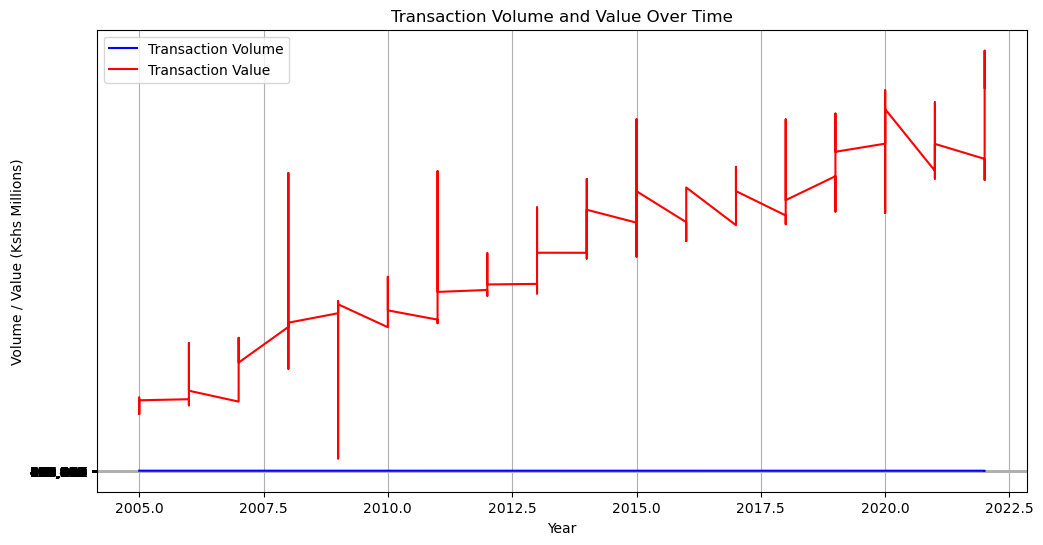

In [6]:
import matplotlib.pyplot as plt

# Line plot for transaction volume and value over time
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Year'], merged_data['Volume'], label='Transaction Volume', color='blue')
plt.plot(merged_data['Year'], merged_data['Value (Kshs Millions)'], label='Transaction Value', color='red')
plt.xlabel('Year')
plt.ylabel('Volume / Value (Kshs Millions)')
plt.title('Transaction Volume and Value Over Time')
plt.legend()
plt.grid(True)
plt.show()

For our next visualization, let's create histograms to visualize the distribution of variables such as inflation rates, GDP growth, transaction volume, and value. Histograms will allow us to observe the frequency distribution of these variables and understand their underlying patterns.

We'll create histograms for the following variables:
1. Annual Average Inflation
2. Annual GDP growth (%)
3. Transaction Volume
4. Transactionased on your preferences or areas of interest!

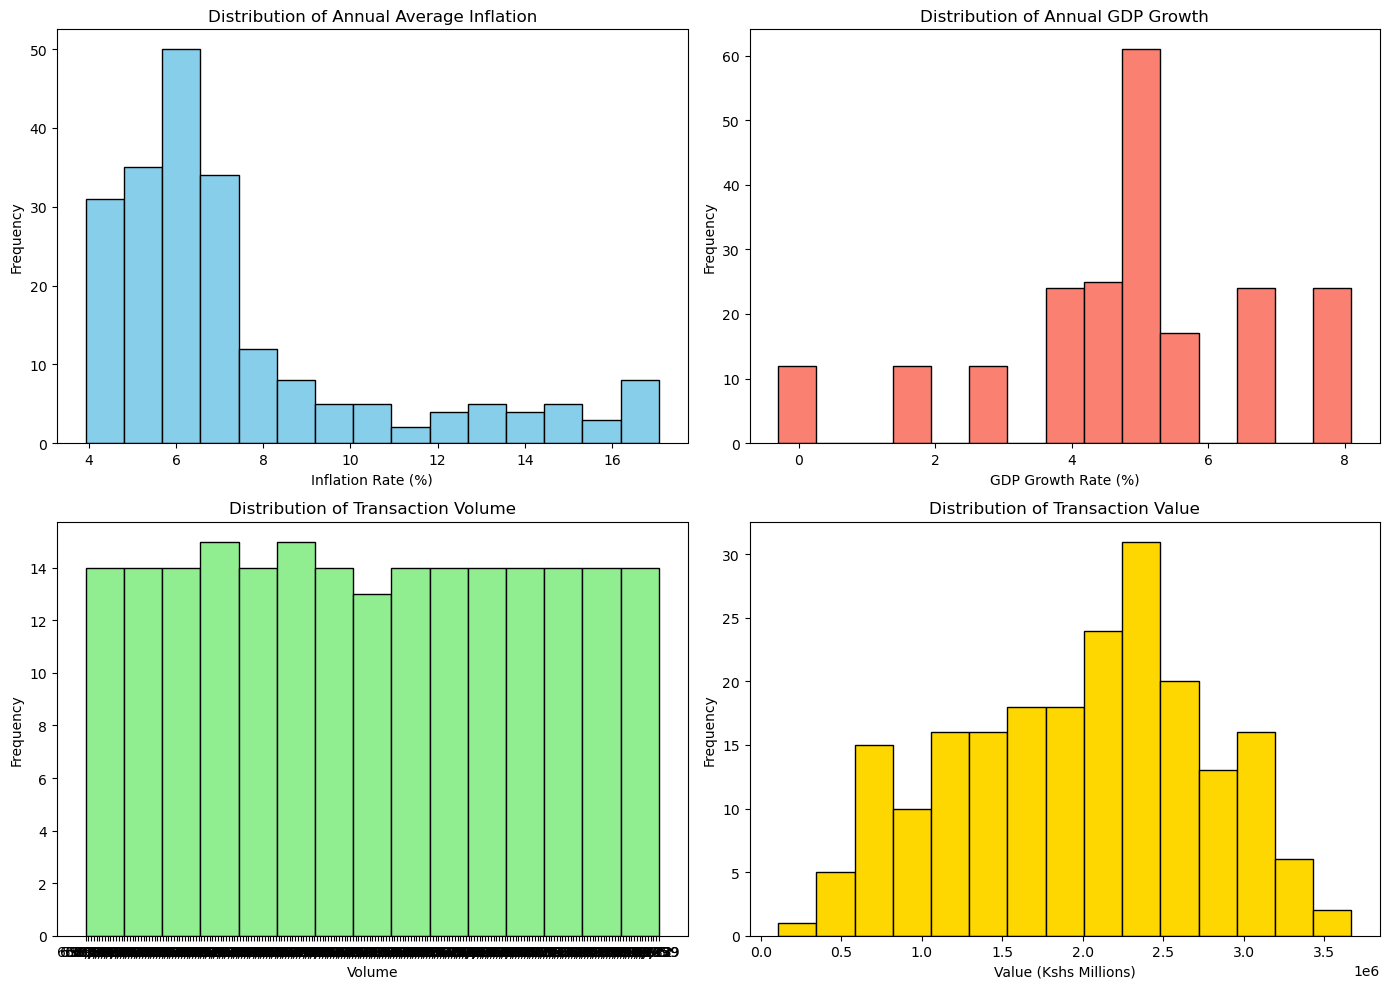

In [7]:
# Histograms for inflation rates, GDP growth, transaction volume, and value
plt.figure(figsize=(14, 10))

# Inflation rates
plt.subplot(2, 2, 1)
plt.hist(merged_data['Annual Average Inflation'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Annual Average Inflation')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('Frequency')

# GDP growth
plt.subplot(2, 2, 2)
plt.hist(merged_data['Annual GDP growth (%)'], bins=15, color='salmon', edgecolor='black')
plt.title('Distribution of Annual GDP Growth')
plt.xlabel('GDP Growth Rate (%)')
plt.ylabel('Frequency')

# Transaction volume
plt.subplot(2, 2, 3)
plt.hist(merged_data['Volume'], bins=15, color='lightgreen', edgecolor='black')
plt.title('Distribution of Transaction Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')

# Transaction value
plt.subplot(2, 2, 4)
plt.hist(merged_data['Value (Kshs Millions)'], bins=15, color='gold', edgecolor='black')
plt.title('Distribution of Transaction Value')
plt.xlabel('Value (Kshs Millions)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

For our next visualization, let's create scatter plots to explore potential relationships between variables. Scatter plots are useful for identifying correlations or patterns between two continuous variables.

We'll create scatter plots to examine the relationships between the following pairs of variables:
1. Annual Average Inflation vs. Transaction Volume
2. Annual GDP Growth vs. Transaction Volume
3. Annual Average Inflation vs. Transaction Value
4. Annual GDP Growth vs. Transactionlyses or visualizations you'd like to explore!

In [10]:
import altair as alt

# Scatter plots for exploring relationships between variables
scatter_plot1 = alt.Chart(merged_data).mark_circle(size=60).encode(
    x='Annual Average Inflation',
    y='Volume',
    tooltip=['Annual Average Inflation', 'Volume']
).properties(
    title='Annual Average Inflation vs. Transaction Volume'
)

scatter_plot2 = alt.Chart(merged_data).mark_circle(size=60).encode(
    x='Annual GDP growth (%)',
    y='Volume',
    tooltip=['Annual GDP growth (%)', 'Volume']
).properties(
    title='Annual GDP Growth vs. Transaction Volume'
)

scatter_plot3 = alt.Chart(merged_data).mark_circle(size=60).encode(
    x='Annual Average Inflation',
    y='Value (Kshs Millions)',
    tooltip=['Annual Average Inflation', 'Value (Kshs Millions)']
).properties(
    title='Annual Average Inflation vs. Transaction Value'
)

scatter_plot4 = alt.Chart(merged_data).mark_circle(size=60).encode(
    x='Annual GDP growth (%)',
    y='Value (Kshs Millions)',
    tooltip=['Annual GDP growth (%)', 'Value (Kshs Millions)']
).properties(
    title='Annual GDP Growth vs. Transaction Value'
)

# Combine scatter plots into a single chart
scatter_plots = (scatter_plot1 | scatter_plot2) & (scatter_plot3 | scatter_plot4)

scatter_plots

alt.VConcatChart(...)